# Futurelab Session 2 Notebook


In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

# Exploratory Data Analysis

In [38]:
# load the titanic dataset
titanic = pd.read_csv('titanic.csv', sep=',', decimal = '.')

In [39]:
# Inspect the data using titanic.head(10)
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
# Inspect the data using titanic.info()
# How many data points do we have, how many features?
# Which columns contain numerics and which contain strings?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
# use data['column_name'].isna.sum() to investigate which columns contain missing numbers
# example: titanic_train['PassengerId'].isna().sum()

0

In [7]:
# Use titanic = titanic.drop(columns=['column_name']) to remove the column which contains the most missing entries
titanic = titanic.drop(columns=['column_name']

In [8]:
# Remove all rows which containt missing entries. Why is it important to do this AFTER the previous line?
# How many rows did you remove? Is this acceptable?
titanic = titanic.dropna(axis=0)

In [9]:
# Use the following code to transform the 'Sex' column from categorical to numeric
# Use head() to investigate the result. What changed?
encoder = LabelEncoder()
titanic['Sex'] = encoder.fit_transform(titanic['Sex']) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    712 non-null int64
Survived       712 non-null int64
Pclass         712 non-null int64
Name           712 non-null object
Sex            712 non-null int32
Age            712 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Ticket         712 non-null object
Fare           712 non-null float64
Embarked       712 non-null object
dtypes: float64(2), int32(1), int64(5), object(3)
memory usage: 64.0+ KB


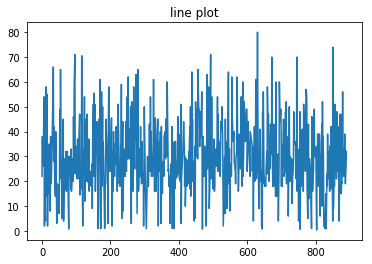

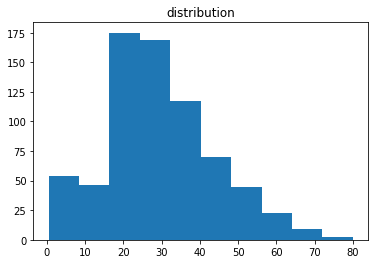

In [12]:
# Use plt.hist(titanic.Age) and plt.plot(titanic.Age) to investigate the age of the passengers
# Do you notice anything strange?
plt.plot(titanic.Age)
plt.title('line plot')
plt.show()

plt.hist(titanic.Age)
plt.title('distribution')
plt.show()

In [13]:
# The passenger age seems to contain a few outliers. Remove all the passengers whose age seems iffy
# use the following code to remove all rows where the age is above a certain threshold
threshold = ?
titanic = titanic[titanic.Age < threshold]

In [14]:
# rerun the cell in which you made the line and distribution plot. Did anything change?

In [15]:
# we want to train a model only using features containing numeric values. Remove all other features
numeric_columns = ['col1', 'col2', 'etc']
titanic = titanic[numeric_columns]
titanic.head()

,PassengerId,Survived,Sex,SibSp,Parch,Fare
0,1,0,1,1,0,7.2500
1,2,1,0,1,0,71.2833
2,3,1,0,0,0,7.9250
3,4,1,0,1,0,53.1000
4,5,0,1,0,0,8.0500


In [16]:
# CONTRATULATIONS!! you have now cleaned your dataset. let's save the clean version and get ready for the fun stuff..
titanic.to_csv('titanic_clean.csv')

# (Linear) Regression

In [40]:
advertising = pd.read_csv('Advertising.csv')

In [41]:
# inspect the advertising dataset using head()

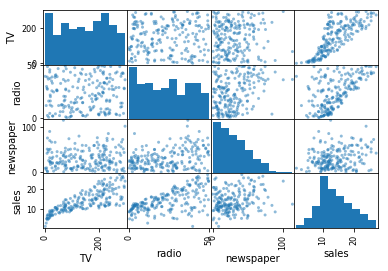

In [19]:
# the advertising dataset contains three features (TV, radio and newspaper) and a target variable (sales)
# use the following code to investigate the relationship between the features and the target
# Which feature(s) seem to have a linear relationship with the target?
scatter_matrix(advertising[['TV', 'radio', 'newspaper', 'sales']])
plt.show()

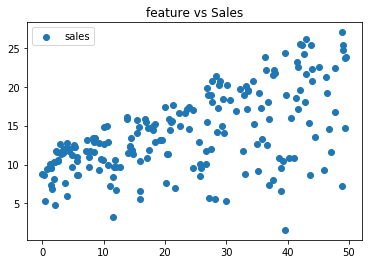

In [20]:
# Looks like the relationship between 'radio' and 'sales' could be well be described with a linear regression model
# let's look at this relationship up close
plt.scatter(advertising['radio'],advertising['sales'])
plt.title('feature vs Sales')
plt.legend()
plt.show()

In [21]:
# Let the fun begin! let's define a linear regression model
def linear_model(radio, weight, bias):
    return weight * radio + bias

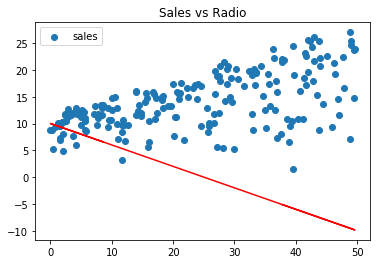

In [22]:
# set the weight and bias of the model and plot the results to see how well your model performs
# change the weight and bias until you are satisfied with your model

# set model parameters
weight = -0.4
bias = 10

# use model to predict sales
sales_prediction = [linear_model(radio, weight, bias) for radio in advertising.radio]

# plot predictions
plt.scatter(advertising['radio'],advertising['sales'])
plt.plot(advertising.radio,sales_prediction, '-r')
plt.title('Sales vs Radio')
plt.legend()
plt.show()

In [23]:
# even though is is possible to build a fairly accurate model by hand it is much more fun to let the computer do all the work!
# to do this we will need a few tools: 
# a cost function to calculate the cost of the error between our prediction and the actual target values
# a function which will update the weight and bias parameters in such a way that it minimizes the cost using gradient descent
# a function which will put everything together and train our model

In [25]:
# define cost function
def cost_function(radio, sales, weight, bias):
    companies = len(radio)
    total_error = 0.0
    for i in range(companies):
        total_error += (sales[i] - (weight*radio[i] + bias))**2
    return total_error / companies

In [26]:
# defince a function to update the weights using gradient descent
def update_weights(radio, sales, weight, bias, learning_rate):
    weight_deriv = 0
    bias_deriv = 0
    companies = len(radio)

    for i in range(companies):
        # Calculate partial derivatives
        # -2x(y - (mx + b))
        weight_deriv += -2*radio[i] * (sales[i] - (weight*radio[i] + bias))

        # -2(y - (mx + b))
        bias_deriv += -2*(sales[i] - (weight*radio[i] + bias))

    # We subtract because the derivatives point in direction of steepest ascent
    weight -= (weight_deriv / companies) * learning_rate
    bias -= (bias_deriv / companies) * learning_rate

    return weight, bias

In [27]:
# define a training funcion
def train(radio, sales, weight, bias, learning_rate, iters):
    cost_history = []

    for i in range(iters):
        weight,bias = update_weights(radio, sales, weight, bias, learning_rate)

        #Calculate cost for auditing purposes
        cost = cost_function(radio, sales, weight, bias)
        cost_history.append(cost)

        # Log Progress
        if i % 10 == 0:
            print( "iter={:d}    weight={:.2f}    bias={:.4f}    cost={:.2}".format(i, weight, bias, cost))
            
            plt.scatter(advertising['radio'],advertising['sales'])
            plt.plot(advertising.radio,[linear_model(radio, weight, bias) for radio in advertising.radio], '-r')
            plt.title('Sales vs Radio')
            plt.legend()
            plt.show()

    return weight, bias, cost_history

iter=0    weight=-1.63    bias=1.0119    cost=3.3e+03


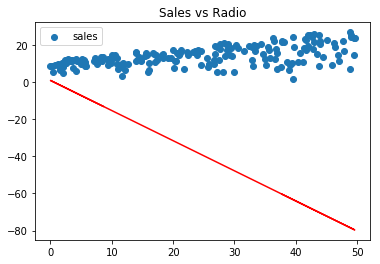

iter=10    weight=0.06    bias=1.0681    cost=1.6e+02


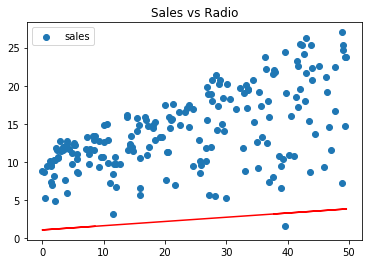

iter=20    weight=0.38    bias=1.0827    cost=4.2e+01


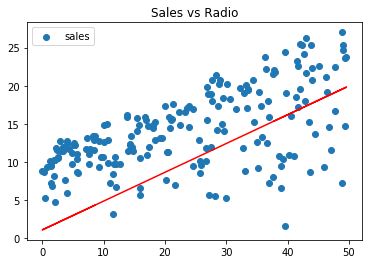

iter=30    weight=0.44    bias=1.0894    cost=3.8e+01


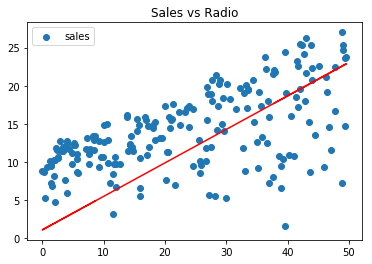

iter=40    weight=0.45    bias=1.0945    cost=3.8e+01


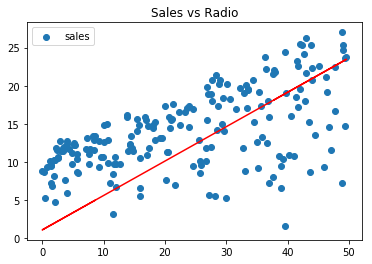

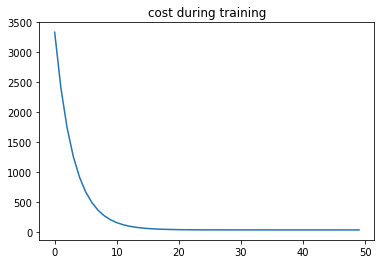

the best model according to your algorithm is: y = 0.4531759611689065*radio + 1.098787341896155


In [28]:
# It is time! let's train our linear regression model

#set parameters
initial_weight = -2
initial_bias = 1
learning_rate = 0.0001
iters = 50

final_weight, final_bias, cost_history = train(radio=advertising.radio, sales=advertising.sales, weight= initial_weight, bias=initial_bias , learning_rate=learning_rate, iters=iters)

plt.plot(cost_history)
plt.title('cost during training')
plt.show()

print('according to your algorithm, the best model  is: y = {}*radio + {}'.format(final_weight, final_bias))

In [ ]:
# Compare the weight and bias to those you determined yourself at the beginning of this excersize. How well did you do?

In [29]:
# rerun the model with learning_rate = 0.1 and learning_rate = 0.0000001. What do you see, and why is this happening? 

In [ ]:
# CONTRATULATIONS!! you have now mastered linear regression! 

for more background information on linear regression, using multiple features or interaction between features, have a look at: https://ml-cheatsheet.readthedocs.io/en/latest/linear_regression.html

# Classification

This time we will not built our model from scratch but instead use pre-made tools from a well-known machine learning package: sklearn. 

Using the titanic dataset you cleaned in the first part of this workshop, we will try to predict which passengers survived the boat's tragic demise

In [33]:
# In the next sections we will built two classifiers using Logistic regression and K-NN
# Play with the parameters predictor_columns, train_size and shuffle_data and built the best model!
# How do the two models compare?

In [34]:
def get_data(predictor_columns,shuffle_data, train_size, random_seed=0):
    """Read the dataset from the CSV file and prepare the data for using it in training and testing the neural network.
    
    Parameters
    ----------
    predictor_columns : list of strings
        The names of the columns used as features
    shuffle_data : bool
        Whether or not the data is shuffled before training the model
    train_size : int
        The number of rows in the dataset of 710 rows in total which will be used for training the
        model. The remainder of the rows will be used for testing the trained model.
    random_seed : int
        Seed for data shuffling.
        
    Returns
    -------
  
    x_testset : numpy array of floats
        Test dataset.
    x_trainset : numpy array of floats
        Train dataset.
    y_testset : numpy array of floats
        Labels test dataset
    y_trainset : numpy array of floats
        Labels train dataset
    """
    
    # Load the dataset from the file
    dataset = pd.read_csv('titanic_clean.csv')

    # Select the correct classification and predictor columns and make numpy arrays of them with the correct types
    # Classification columns: ['PassengerId', 'Sex', 'SibSp', 'Parch', 'Fare']
    y = dataset['Survived']
    y = np.array(y, dtype='float32')

    # Predictor columns
    x = dataset[predictor_columns]
    x = np.array(x, dtype='float32')

    # Shuffle the data; initially the data is ordered based on their class
    if shuffle_data:
        np.random.seed(random_seed)
        indices = np.random.choice(len(x), len(x), replace=False)
        x_values, y_values = x[indices], y[indices]
    else:
        x_values, y_values = x, y

    # Create a train set and a test set. Total dataset size is 710.
    test_size = 710 - train_size
    x_testset = x_values[-test_size:]
    x_trainset = x_values[:-test_size]
    y_testset = y_values[-test_size:]
    y_trainset = y_values[:-test_size]

    return x_testset, x_trainset, y_testset, y_trainset


In [35]:
# choose which features you want to use. Choose from: 'PassengerId', 'Sex', 'SibSp', 'Parch', 'Fare'
predictor_columns = ['SibSp', 'Parch']

# determine the size of your trainingset, remember that the entire dataset contains 710 passengers
train_size=550

# shuffle data
shuffle_data=False

# import data
x_testset, x_trainset, y_testset, y_trainset = get_data(predictor_columns, shuffle_data, train_size, random_seed=0)

### Logistic regression classifier

In [36]:
# Built a logistic regression model

logResModel = LogisticRegression(solver='liblinear')

# Train model
logResModel.fit(x_trainset, y_trainset)

# Run on test set
acc = logResModel.score(x_testset, y_testset)

# Print results
print("REPORT")
print("------------------------------------------------------------------------------")
print("Predictor columns: " + str(predictor_columns))
print("Shuffle data: " + str(shuffle_data))
print("Training dataset size: " + str(train_size))
print("------------------------------------------------------------------------------")
print("Tree test accuracy: " + str(acc))


REPORT
------------------------------------------------------------------------------
Predictor columns: ['SibSp', 'Parch']
Shuffle data: False
Training dataset size: 550
------------------------------------------------------------------------------
Tree test accuracy: 0.60625


### K - NN

In [37]:
# Built a K-nn classifier

# number of neighbors used in K-nn
n_neighbors=1

KnnModel = KNeighborsClassifier(n_neighbors)

# Train model
KnnModel.fit(x_trainset, y_trainset)

# Run on test set
acc = KnnModel.score(x_testset, y_testset)

# Print results
print("REPORT")
print("------------------------------------------------------------------------------")
print("Predictor columns: " + str(predictor_columns))
print("Shuffle data: " + str(shuffle_data))
print("Training dataset size: " + str(train_size))
print("------------------------------------------------------------------------------")
print("Tree test accuracy: " + str(acc))


REPORT
------------------------------------------------------------------------------
Predictor columns: ['SibSp', 'Parch']
Shuffle data: False
Training dataset size: 550
------------------------------------------------------------------------------
Tree test accuracy: 0.675


In [ ]:
# alter the number of neighbors used in your k-nn classifier. How does this change the accuracy?